# Machine learning Multiclass Classifcation



In [ ]:
# Package imports
import numpy as np
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import imblearn

## 1. Loading the dataset and preprocessing

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,2709,59.0,11,120,43,150,228,217,120,2114,0.66,269,FC11,CA49,R1,Melon
1,2802,54.0,7,0,0,693,224,225,136,162,0.35,195,FC11,CA50,NaN,Melon
2,2325,28.0,12,0,0,1260,215,213,133,162,0.89,750,FC14,CA26,NaN,Carrot
3,2837,112.0,8,272,16,3649,235,231,128,6221,0.27,-155,FC11,CA32,NaN,Orange
4,2509,59.0,7,134,10,900,226,226,134,5184,0.93,88,FC11,CA38,NaN,Melon



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


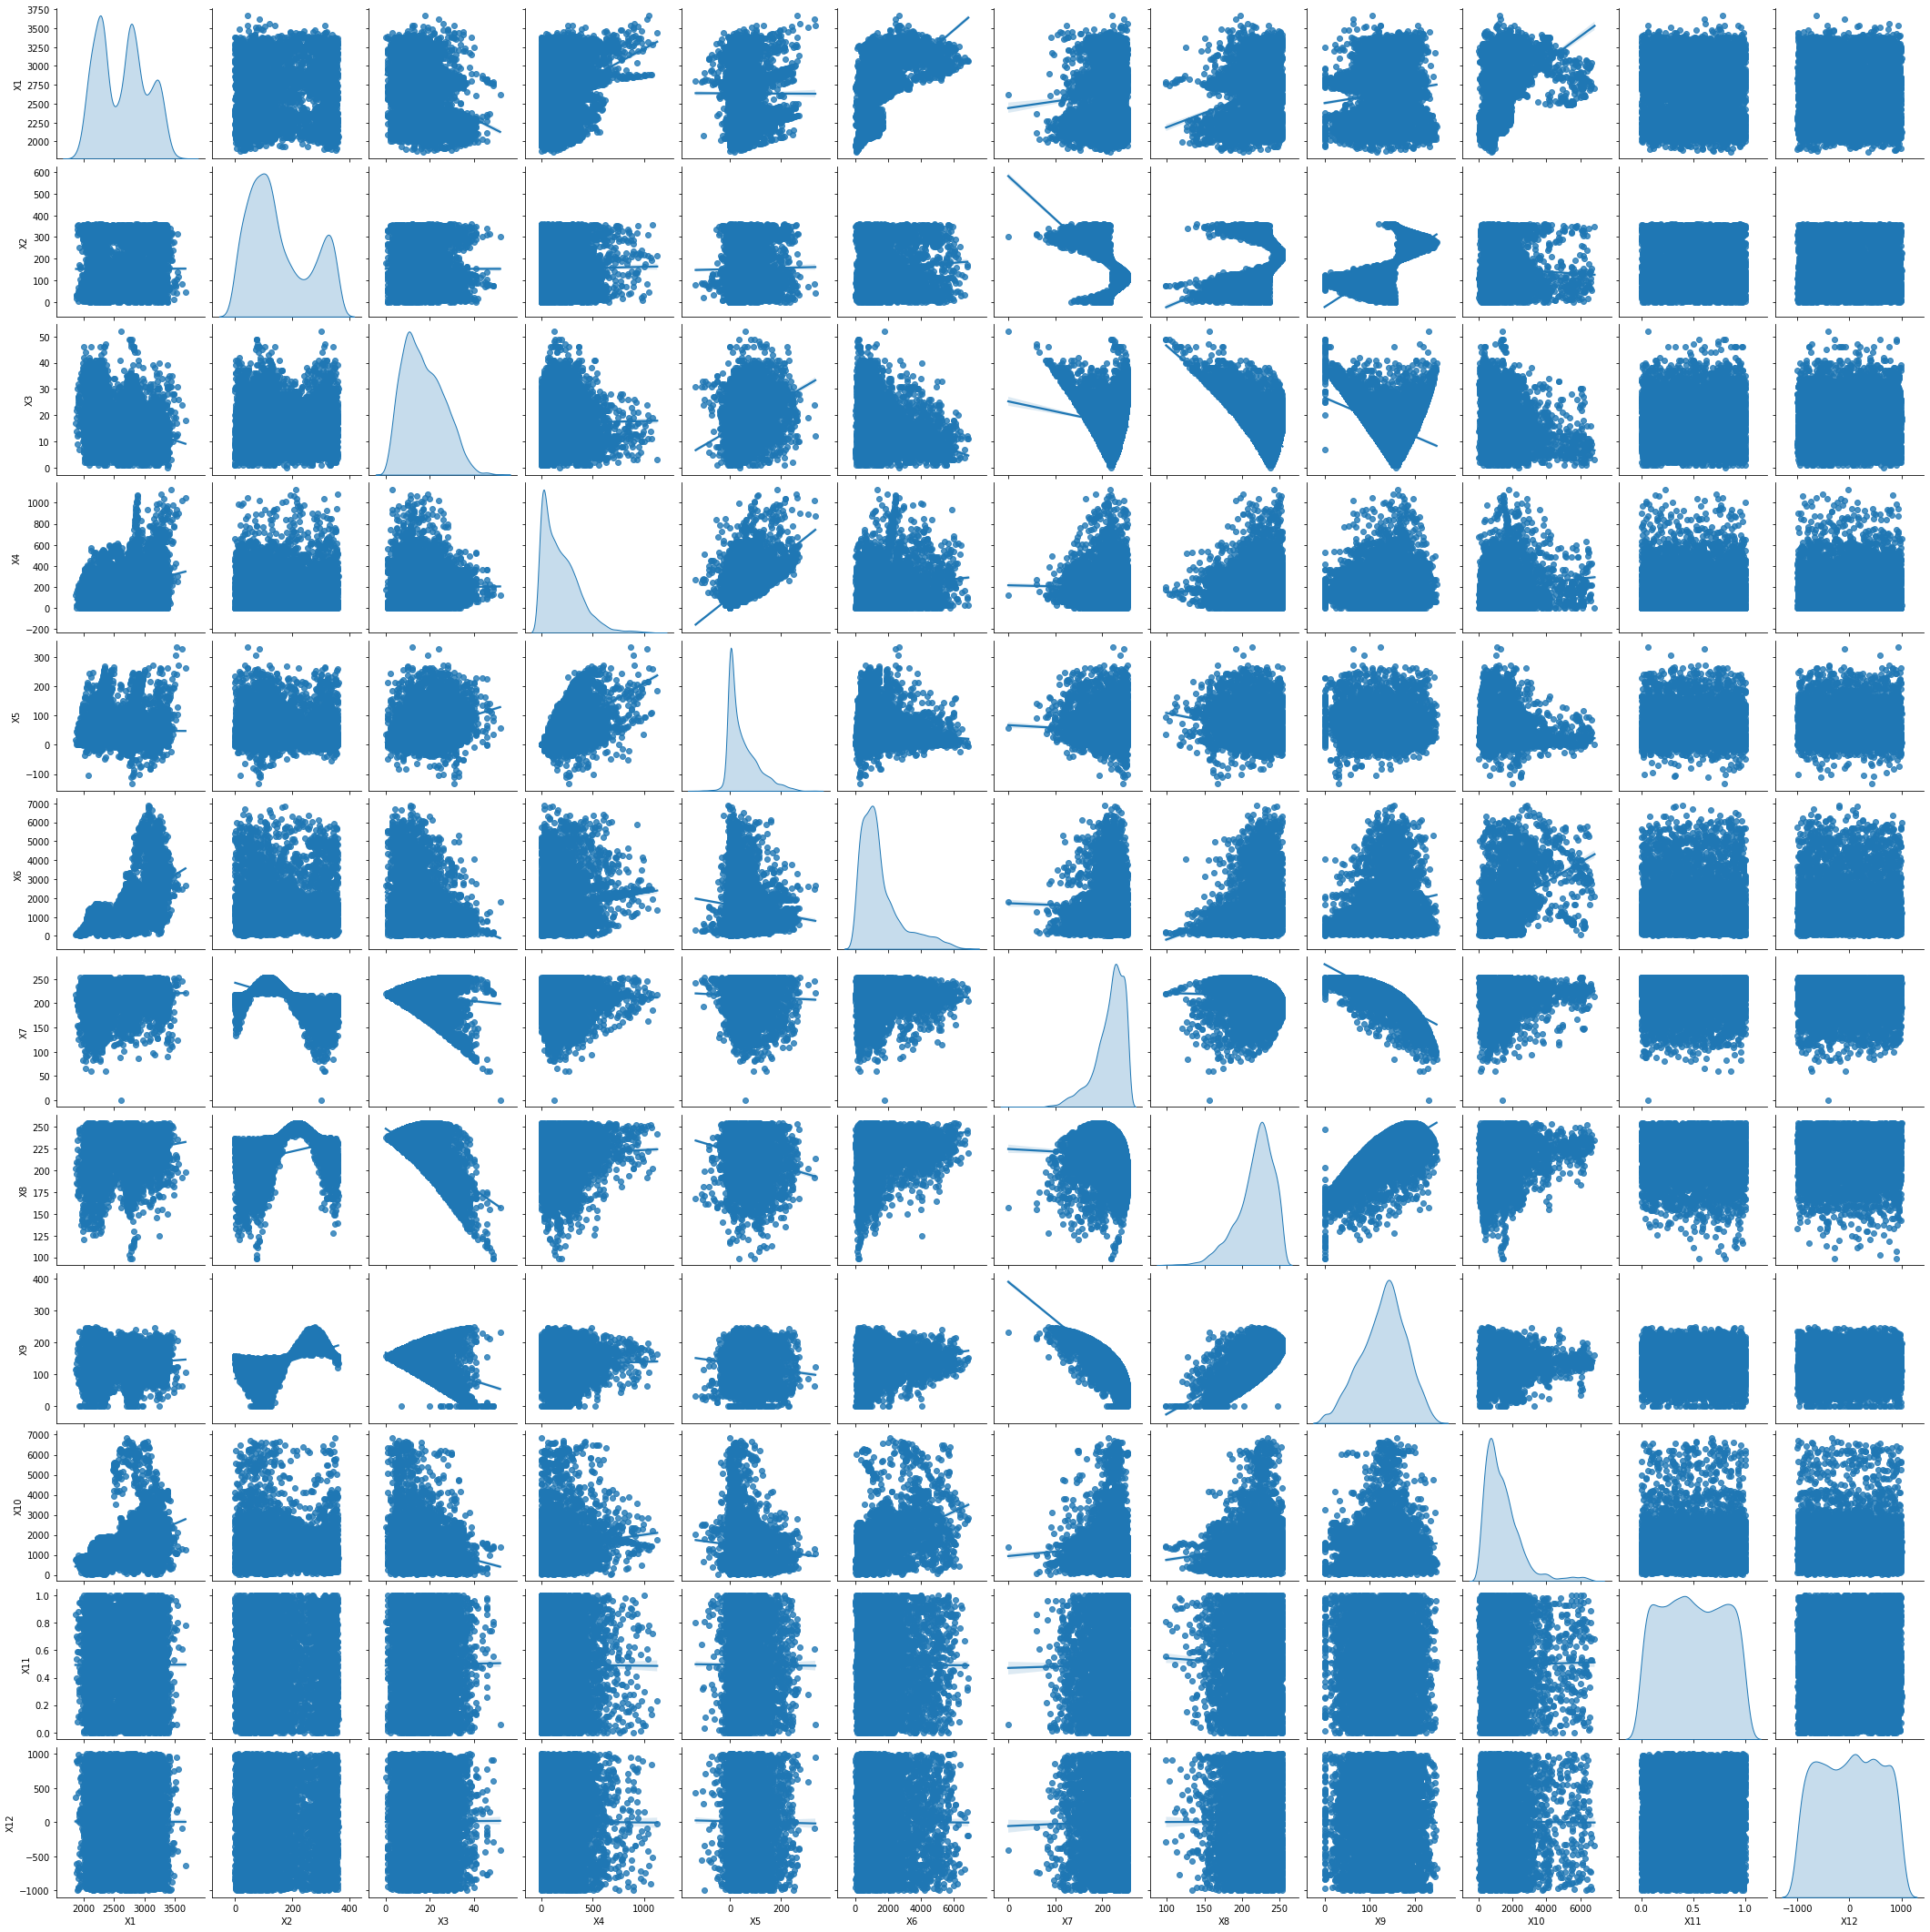

In [ ]:
df = pd.read_csv('Dataset-vf.csv', header=0)
display(df.head())
print()
corr = df.corr()
# print the info of the data to see how to fill null fields
df.info()

x_set = df.iloc[:,:-1].values
y_set = df.iloc[:,-1].values


df.describe()

sns.pairplot(df, kind="reg", diag_kind="kde")

##Correlation analysis

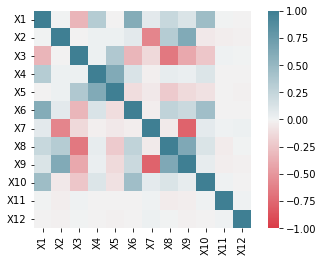

In [ ]:
%matplotlib inline

import seaborn as sns

# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

it seams that X7 and X9 are highly inversly correlated.


## Dealing with missing values

In [ ]:
# print the number of the missing values of X2
missing_values_sum = df["X2"].isna().sum()
print(f"The number of missing values is: {missing_values_sum}")


# calculate the mean value of X2 feature 
X2_avg = df["X2"].mean()
print(f"X2_avg is {X2_avg}")


# fill the missing fields in X2 by filling it with the mean value
df["X2"].fillna(X2_avg, inplace=True)

# print the number of the missing values after filling
missing_values_sum = df["X2"].isna().sum()
print(f"The number of missing values is: {missing_values_sum}")

# print the info of the data 
df.info()

The number of missing values is: 627
X2_avg is 153.23960327127196
The number of missing values is: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


In [ ]:
# print the number of the missing values of X15
missing_values_sum = df["X15"].isna().sum()
print(f"The number of missing values is: {missing_values_sum}")


# Since feature X15 has very low data, it might be better to drop it
df = df.drop(["X15"], axis=1)


# print the number of the missing values after filling
missing_values_sum = df["X2"].isna().sum()
print(f"The number of missing values is: {missing_values_sum}")


# print the info of the data 
df.info()

The number of missing values is: 5743
The number of missing values is: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 747.1+ KB


In [ ]:
# drop X7 since it is highly corelated with X9
df = df.drop(["X7"], axis=1)

# print the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X8      6374 non-null   int64  
 7   X9      6374 non-null   int64  
 8   X10     6374 non-null   int64  
 9   X11     6374 non-null   float64
 10  X12     6374 non-null   int64  
 11  X13     6374 non-null   object 
 12  X14     6374 non-null   object 
 13  Y       6374 non-null   object 
dtypes: float64(2), int64(9), object(3)
memory usage: 697.3+ KB


## Preprocessing with One-hot-encoding

In [ ]:
x_set = df.iloc[:,:-1]
y_set = df.iloc[:, -1]

# one hot encode the input features with categorical values 
x_one_hot_encode = pd.get_dummies(x_set, columns=['X13','X14'])


# one hot encode the output classes
y_one_hot_encode = pd.get_dummies(y_set)


print(x_one_hot_encode)
print(y_one_hot_encode)

x_one_hot_encode.describe()



        X1     X2  X3   X4   X5    X6   X8   X9   X10   X11  ...  X14_ CA49  \
0     2709   59.0  11  120   43   150  217  120  2114  0.66  ...          1   
1     2802   54.0   7    0    0   693  225  136   162  0.35  ...          0   
2     2325   28.0  12    0    0  1260  213  133   162  0.89  ...          0   
3     2837  112.0   8  272   16  3649  231  128  6221  0.27  ...          0   
4     2509   59.0   7  134   10   900  226  134  5184  0.93  ...          0   
...    ...    ...  ..  ...  ...   ...  ...  ...   ...   ...  ...        ...   
6369  3101   67.0   6  170    1   824  228  135  1657  0.50  ...          0   
6370  3050  139.0  13   30   -3  3127  235  123  5770  0.74  ...          0   
6371  2080  106.0  24   30   12   582  202   64   108  0.88  ...          0   
6372  3011  108.0  10  212   36  2912  229  122  6632  0.67  ...          1   
6373  1980    3.0  22  300  125   300  193  140   927  0.93  ...          0   

      X14_ CA50  X14_ CA51  X14_ CA52  X14_ CA53  X

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,...,X14_ CA49,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,...,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,218.024318,130.301224,1425.017728,0.494167,...,0.091936,0.068403,0.020709,0.035143,0.025573,0.000784,0.000157,0.022749,0.022435,0.007844
std,394.715236,100.289025,9.008995,177.839135,57.640187,1281.423405,23.850334,49.012495,1109.522425,0.291627,...,0.288958,0.252456,0.142420,0.184155,0.157869,0.027999,0.012525,0.149113,0.148105,0.088227
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,99.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2282.000000,75.000000,10.000000,42.000000,2.000000,624.000000,206.000000,98.000000,663.000000,0.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2686.000000,135.000000,16.000000,150.000000,28.000000,1150.000000,222.000000,135.000000,1168.000000,0.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2919.000000,219.000000,24.000000,295.000000,78.000000,1959.000000,235.000000,165.000000,1852.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,248.000000,6853.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(x_set, y_set)

##splitting the data and showing some statistics

In [ ]:

# information of the data befor on hot encoding 

X_train, X_rem, y_train, y_rem = train_test_split(x_set, y_set, train_size =0.7, random_state=777, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size =0.5, random_state=777)
print("information of the data befor on hot encoding ")

print('Dataset={}'.format(df.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))
print('the number of classes is ',len(np.unique(y_train)))
print()

x_set = x_one_hot_encode
# y_set = y_one_hot_encode



# information of the data after on hot encoding 

X_train, X_rem, y_train, y_rem = train_test_split(x_set, y_set, train_size =0.7, random_state=777, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size =0.5, random_state=777)

information of the data befor on hot encoding 
Dataset=(6374, 14)
X_train=(4461, 13), X_val=(956, 13), X_test=(957, 13)
y_train=(4461,), y_val=(956,), y_test=(957,)

class % in y_train = [0.19 0.2  0.25 0.04 0.26 0.02 0.05]
class % in y_val = [0.21 0.19 0.26 0.05 0.23 0.02 0.05]
class % in y_test = [0.22 0.19 0.27 0.03 0.22 0.01 0.06]
the number of classes is  7



## Scalling The Data


In [ ]:

#################### Standard Scaller: z = (x — x_mean) / std ######################
scaler = preprocessing.StandardScaler().fit(X_train)


# #################### MinMax Scaller: z = (x — x_min) / (x_max - x_min) ######################
# scaler = preprocessing.MinMaxScaler().fit(X_train)


# #################### MaxAbsScaler Scaller: z = Xi /|Xmax| ######################
# scaler = preprocessing.MaxAbsScaler.fit(X_train)



X_train = scaler.transform(X_train)

# test_data is scaled according to the training scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

####
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

type(X_train)
pd.DataFrame(X_train).describe()



,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,...,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03,4.461000e+03
mean,1.656500e-16,-2.930730e-16,1.481293e-16,-4.778364e-17,7.963940e-19,6.371152e-17,4.189032e-16,2.054697e-16,5.176561e-17,8.760334e-17,...,7.167546e-17,3.006387e-17,7.963940e-18,-6.371152e-18,1.911346e-17,9.556728e-18,3.185576e-18,-1.393690e-17,2.349362e-17,-2.229903e-17
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,...,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.961595e+00,-1.517686e+00,-1.899087e+00,-1.074188e+00,-3.139021e+00,-1.170843e+00,-4.950815e+00,-2.644002e+00,-1.263231e+00,-1.701272e+00,...,-3.189883e-01,-2.798529e-01,-1.443045e-01,-1.819813e-01,-1.641149e-01,-2.995771e-02,-1.497382e-02,-1.544980e-01,-1.490883e-01,-8.228293e-02
25%,-8.930551e-01,-7.795164e-01,-7.897010e-01,-8.400481e-01,-7.963508e-01,-6.993168e-01,-5.293181e-01,-6.646780e-01,-6.890936e-01,-8.740434e-01,...,-3.189883e-01,-2.798529e-01,-1.443045e-01,-1.819813e-01,-1.641149e-01,-2.995771e-02,-1.497382e-02,-1.544980e-01,-1.490883e-01,-8.228293e-02
50%,1.295807e-01,-1.810004e-01,-1.240692e-01,-2.379739e-01,-3.312620e-01,-2.733717e-01,1.797899e-01,1.107271e-01,-2.310535e-01,-1.234693e-02,...,-3.189883e-01,-2.798529e-01,-1.443045e-01,-1.819813e-01,-1.641149e-01,-2.995771e-02,-1.497382e-02,-1.544980e-01,-1.490883e-01,-8.228293e-02
75%,7.008287e-01,6.070458e-01,7.634398e-01,5.703664e-01,4.955627e-01,3.333249e-01,7.220490e-01,6.820782e-01,3.975044e-01,8.838174e-01,...,-3.189883e-01,-2.798529e-01,-1.443045e-01,-1.819813e-01,-1.641149e-01,-2.995771e-02,-1.497382e-02,-1.544980e-01,-1.490883e-01,-8.228293e-02
max,2.659393e+00,2.073410e+00,3.869721e+00,4.918680e+00,4.922520e+00,4.243846e+00,1.514582e+00,2.416537e+00,4.751152e+00,1.745514e+00,...,3.134911e+00,3.573306e+00,6.929789e+00,5.495071e+00,6.093292e+00,3.338038e+01,6.678323e+01,6.472575e+00,6.707435e+00,1.215319e+01


In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(x_set)
print(pca.explained_variance_ratio_)

[0.63737511 0.22622603 0.09669624 0.02718986 0.00824941]


## Dealing with imbalanced data

['Melon' 'Melon' 'Berry' ... 'Berry' 'Mango' 'Berry']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Dataset=(6374, 14)
X_train=(7980, 47), X_val=(956, 47), X_test=(957, 47)
y_train=(7980,), y_val=(956,), y_test=(957,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


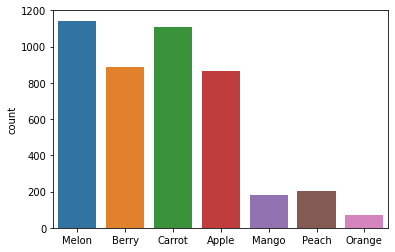

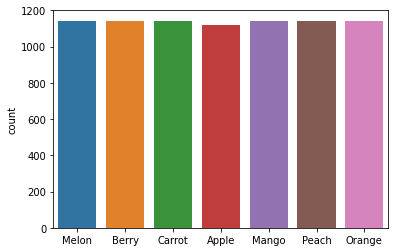

In [ ]:
# printing the data with one hot encoding and with numbered classification
print(y_train)
# print(np.argmax(y_train, axis=1))

# printing the percentage of each class in the data
plt.figure()
sns.countplot(y_train)


# Define SMOTE-Tomek Links to upsample the data
balance_data = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train, y_train = balance_data.fit_resample(X_train, y_train)


# reprint data infromation 
print('Dataset={}'.format(df.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))

plt.figure()
sns.countplot(y_train)

## Printing The Data statistics After Upsampling

In [ ]:

pd.DataFrame(X_train).describe()


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,...,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,0.182364,0.015991,-0.055594,-0.002576,-0.065229,0.298132,0.006040,0.113463,0.481484,0.031430,...,0.145055,-0.052110,-0.043703,-0.059619,0.108883,-0.001905,-0.002612,0.190973,0.202330,0.061844
std,1.053763,1.015466,0.954118,0.905101,0.894999,1.218491,0.951311,0.928761,1.425790,0.954200,...,1.169486,0.906508,0.835307,0.824482,1.275349,0.909182,0.800377,1.473223,1.512052,1.320193
min,-1.961595,-1.517686,-1.899087,-1.074188,-3.139021,-1.170843,-4.950815,-2.644002,-1.263231,-1.701272,...,-0.318988,-0.279853,-0.144305,-0.181981,-0.164115,-0.029958,-0.014974,-0.154498,-0.149088,-0.082283
25%,-0.778295,-0.799467,-0.789701,-0.718937,-0.743523,-0.591075,-0.445894,-0.460624,-0.587162,-0.775016,...,-0.318988,-0.279853,-0.144305,-0.181981,-0.164115,-0.029958,-0.014974,-0.154498,-0.149088,-0.082283
50%,0.252259,-0.181000,-0.180677,-0.171077,-0.351094,-0.142916,0.179790,0.151538,0.048207,0.022121,...,-0.318988,-0.279853,-0.144305,-0.181981,-0.164115,-0.029958,-0.014974,-0.154498,-0.149088,-0.082283
75%,1.090409,0.756675,0.652501,0.470021,0.329201,0.929805,0.650186,0.738147,1.032824,0.869812,...,-0.318988,-0.279853,-0.144305,-0.181981,-0.164115,-0.029958,-0.014974,-0.154498,-0.149088,-0.082283
max,2.659393,2.073410,3.869721,4.918680,4.922520,4.243846,1.514582,2.416537,4.751152,1.745514,...,3.134911,3.573306,6.929789,5.495071,6.093292,33.380383,66.783231,6.472575,6.707435,12.153189


## Training The Data

In [ ]:
from sklearn.metrics import classification_report 
X_train_val_merge = X_train
y_train_val_merge = y_train

clf_results = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {
              'max_iter':[1000],
              'C': [0.1, 1, 10, 100], 
              'penalty': ['none','l1', 'l2','elasticnet'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              } 
  
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["LogisticRegression"] = clf.best_estimator_


# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.849 total time=  21.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.857 total time=  23.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.863 total time=  18.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.848 total time=   7.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.857 total time=   7.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.863 total time=   9.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=  10.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=   7.6s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.850 total time=  12.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.853 total time=  13.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.860 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.874 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.875 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.846 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.852 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.854 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.872 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.870 total time=  14.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=0.837 total time=  18.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=0.838 total time=  18.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=0.838 total time=  19.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=0.852 total time=  18.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=saga;, score=0.849 total time=  18.5s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.830 total time=   1.3s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.830 total time=   1.2s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.831 total time=   1.3s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.841 total time=   1.2s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.837 total time=   1.3s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.830 total time=   1.2s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.830 total time=   1.2s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.831 total time=   1.5s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.841 total time=   1.6s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l2, solv

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.848 total time=   7.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.857 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.863 total time=   7.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=   8.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=  10.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.850 total time=  11.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.853 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.860 total time=  11.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.874 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.875 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.846 total time=  14.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.852 total time=  14.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.854 total time=  13.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.872 total time=  13.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.870 total time=  14.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.843 total time=  18.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.850 total time=  19.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.853 total time=  19.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.871 total time=  18.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.870 total time=  18.9s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.847 total time=   2.6s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=   2.6s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.855 total time=   2.3s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.871 total time=   2.6s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.873 total time=   2.6s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.847 total time=   2.9s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.854 total time=   3.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.855 total time=   3.1s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.871 total time=   3.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.873

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.847 total time=  11.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.853 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.855 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.870 total time=  11.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.873 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.843 total time=  13.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.850 total time=  15.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.850 total time=  14.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.864 total time=  14.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.865 total time=  13.9s
[CV 1/5] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=newton-cg;, score=0.857 total time=  16.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=newton-cg;, score=0.863 total time=  18.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=none, solver=lbfgs;, score=0.848 total time=   7.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=lbfgs;, score=0.857 total time=   7.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=lbfgs;, score=0.863 total time=   8.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=  11.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=   7.5s
[CV 1/5] END C=10, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=none, solver=sag;, score=0.850 total time=  11.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=sag;, score=0.853 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=sag;, score=0.860 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=sag;, score=0.874 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=sag;, score=0.875 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.846 total time=  14.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.852 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.854 total time=  14.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.872 total time=  14.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.870 total time=  14.3s
[CV 1/5] END C=10, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l1, solver=liblinear;, score=0.818 total time= 9.3min
[CV 2/5] END C=10, max_iter=1000, penalty=l1, solver=liblinear;, score=0.818 total time=  15.9s
[CV 3/5] END C=10, max_iter=1000, penalty=l1, solver=liblinear;, score=0.823 total time=  12.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l1, solver=liblinear;, score=0.831 total time= 9.4min
[CV 5/5] END C=10, max_iter=1000, penalty=l1, solver=liblinear;, score=0.837 total time=  12.6s
[CV 1/5] END C=10, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l1, solver=saga;, score=0.846 total time=  20.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=l1, solver=saga;, score=0.851 total time=  20.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=l1, solver=saga;, score=0.854 total time=  20.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l1, solver=saga;, score=0.872 total time=  20.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=l1, solver=saga;, score=0.872 total time=  20.2s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.848 total time=   5.2s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.855 total time=   5.1s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.861 total time=   5.3s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.879 total time=   5.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.877 total time=   4.7s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.848 total time=   7.4s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.855 total time=   7.7s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.861 total time=   9.6s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.879 total time=  10.3s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.850 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.853 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.858 total time=  11.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.875 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.874 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=saga;, score=0.846 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=saga;, score=0.850 total time=  14.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=saga;, score=0.854 total time=  14.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=saga;, score=0.873 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=saga;, score=0.872 total time=  14.4s
[CV 1/5] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=none, solver=newton-cg;, score=0.857 total time=  16.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=none, solver=newton-cg;, score=0.863 total time=  18.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=none, solver=newton-cg;, score=0.878 total time=  13.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=none, solver=lbfgs;, score=0.848 total time=   7.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=none, solver=lbfgs;, score=0.857 total time=   9.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=none, solver=lbfgs;, score=0.863 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=  12.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=none, solver=lbfgs;, score=0.878 total time=   7.6s
[CV 1/5] END C=100, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=none, solver=sag;, score=0.850 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=none, solver=sag;, score=0.853 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=none, solver=sag;, score=0.860 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=none, solver=sag;, score=0.874 total time=  13.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=none, solver=sag;, score=0.875 total time=  12.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=none, solver=saga;, score=0.846 total time=  14.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=none, solver=saga;, score=0.852 total time=  14.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=none, solver=saga;, score=0.854 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=none, solver=saga;, score=0.872 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=none, solver=saga;, score=0.870 total time=  14.3s
[CV 1/5] END C=100, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=1000, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=l1, solver=liblinear;, score=0.816 total time=18.1min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=l1, solver=liblinear;, score=0.817 total time=18.6min
[CV 3/5] END C=100, max_iter=1000, penalty=l1, solver=liblinear;, score=0.823 total time=  21.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=l1, solver=liblinear;, score=0.834 total time=18.8min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=l1, solver=liblinear;, score=0.840 total time=18.7min
[CV 1/5] END C=100, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=l1, solver=saga;, score=0.846 total time=  20.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=l1, solver=saga;, score=0.852 total time=  20.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=l1, solver=saga;, score=0.854 total time=  20.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=l1, solver=saga;, score=0.872 total time=  20.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=l1, solver=saga;, score=0.871 total time=  20.9s
[CV 1/5] END C=100, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.848 total time=  15.7s
[CV 2/5] END C=100, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.857 total time=  13.2s
[CV 3/5] END C=100, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.862 total time=  16.8s
[CV 4/5] END C=100, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.878 total time=  14.9s
[CV 5/5] END C=100, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.878 total time=  12.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=100, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.848 total time=   7.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=100, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.857 total time=  13.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=100, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.862 total time=  13.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=100, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.878 total time=  15.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=100, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.878 total time=  13.4s
[CV 1/5] END C=100, max_iter=1000, penalty=l2, solver=liblinear;, score=0.816 total time=   1.5s
[CV 2/5] END C=100, max_iter=1000, penalty=l2, solver=liblinear;, score=0.819 total time=   1.6s
[CV 3/5] END C=100, max_iter=1000, penalty=l2, solver=liblinear;, score=0.823 total time=   1.6s
[CV 4/5] END C=100, max_iter=1000, penalty=l2, solver=liblinear;, score=0.833 total time=   1.6s
[CV 5/5] END C=100, max_iter=1000, penalty=l2, solver=liblinear;, score=0.838 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=l2, solver=sag;, score=0.850 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=l2, solver=sag;, score=0.853 total time=  12.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=l2, solver=sag;, score=0.860 total time=  12.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=l2, solver=sag;, score=0.875 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=1000, penalty=l2, solver=sag;, score=0.875 total time=  12.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=1000, penalty=l2, solver=saga;, score=0.846 total time=  14.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=1000, penalty=l2, solver=saga;, score=0.852 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=1000, penalty=l2, solver=saga;, score=0.854 total time=  14.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=1000, penalty=l2, solver=saga;, score=0.872 total time=  14.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, s

[CV 5/5] END C=100, max_iter=1000, penalty=l2, solver=saga;, score=0.871 total time=  14.5s
[CV 1/5] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# defining parameter range
param_grid = {
              'criterion': ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 40, 20]
              } 

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["DecisionTreeClassifier"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto;, score=0.852 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto;, score=0.909 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto;, score=0.912 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto;, score=0.902 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto;, score=0.917 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.872 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.905 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.901 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.917 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.92

S

In [ ]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {
              'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              } 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["SVC"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.863 total time=   0.8s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.867 total time=   0.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.867 total time=   0.8s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.870 total time=   0.8s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.871 total time=   0.8s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.746 total time=   2.7s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.753 total time=   2.7s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.747 total time=   2.7s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.744 total time=   2.8s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.721 total time=   2.8s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.772 total time=   2.5s
[CV 2/5] END .................C=0.1, kernel=rbf;

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# defining parameter range
param_grid = {
              'n_estimators': [40, 60, 80, 100], 
              'criterion': ["gini", "entropy"],
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth': [20, 40, None]
              } 

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose= 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["RandomForestClassifier"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=40;, score=0.929 total time=   2.5s
[CV 2/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=40;, score=0.949 total time=   2.4s
[CV 3/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=40;, score=0.954 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=40;, score=0.950 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=40;, score=0.961 total time=   2.4s
[CV 1/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=60;, score=0.931 total time=   3.7s
[CV 2/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=60;, score=0.950 total time=   3.6s
[CV 3/5] END criterion=gini, max_depth=20, max_features=None, n_estimators=60;, score=0.950 total time=   3.7s
[CV 4/5] END criterion=gini, max_depth=20, max_fea

In [ ]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = {
              'activation': ["identity", "logistic", "relu"], 
              'solver': ["adam"],
              'alpha': [0.0001, 0.001, 0.01],
              'max_iter': [1000]
              } 

grid = GridSearchCV(MLPClassifier(), param_grid, refit=True, verbose= 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["MLPClassifier"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END activation=identity, alpha=0.0001, max_iter=1000, solver=adam;, score=0.849 total time=   4.7s
[CV 2/5] END activation=identity, alpha=0.0001, max_iter=1000, solver=adam;, score=0.855 total time=   5.1s
[CV 3/5] END activation=identity, alpha=0.0001, max_iter=1000, solver=adam;, score=0.860 total time=   4.9s
[CV 4/5] END activation=identity, alpha=0.0001, max_iter=1000, solver=adam;, score=0.877 total time=   5.9s
[CV 5/5] END activation=identity, alpha=0.0001, max_iter=1000, solver=adam;, score=0.874 total time=   5.1s
[CV 1/5] END activation=identity, alpha=0.001, max_iter=1000, solver=adam;, score=0.848 total time=   4.2s
[CV 2/5] END activation=identity, alpha=0.001, max_iter=1000, solver=adam;, score=0.851 total time=   4.5s
[CV 3/5] END activation=identity, alpha=0.001, max_iter=1000, solver=adam;, score=0.862 total time=   4.9s
[CV 4/5] END activation=identity, alpha=0.001, max_iter=1000, solver=adam;, sco

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {
              'n_neighbors': [1, 3, 5, 7], 
              'weights': ["uniform", "distance"],
              'p': [1, 2]
              } 

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose= 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["KNeighborsClassifier"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.927 total time=   0.5s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.939 total time=   0.4s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.932 total time=   0.4s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.945 total time=   0.4s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.977 total time=   0.4s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.927 total time=   0.4s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.939 total time=   0.4s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.932 total time=   0.4s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.945 total time=   0.4s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.977 total time=   0.4s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.914 total time=   0.2s
[CV 2/5] END n_neighbors=1, p=2,

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# defining parameter range
param_grid = {
              'n_estimators': [20, 50, 80, 100], 
               'learning_rate': [0.001, 0.01, 0.1, 1],
              'algorithm': ["SAMME", "SAMME.R"]
              } 

grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True, verbose= 3)

clf = grid.fit(X_train_val_merge, y_train_val_merge)
clf_results["AdaBoostClassifier"] = clf.best_estimator_

# evaluate on X_train, y_train and X_val, y_val
y_pred_on_train = clf.predict(X_train_val_merge)
train_acc = sklearn.metrics.accuracy_score(y_true=y_train_val_merge, y_pred=y_pred_on_train)

print(" train_acc={:.2f}".format( train_acc))
print(classification_report(y_train_val_merge,y_pred_on_train))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=20;, score=0.286 total time=   0.4s
[CV 2/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=20;, score=0.286 total time=   0.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=20;, score=0.286 total time=   0.4s
[CV 4/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=20;, score=0.286 total time=   0.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=20;, score=0.286 total time=   0.4s
[CV 1/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=50;, score=0.286 total time=   1.0s
[CV 2/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=50;, score=0.286 total time=   0.9s
[CV 3/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=50;, score=0.286 total time=   1.0s
[CV 4/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=50;, score=0.286 total time=   1.5s
[CV 5/5] END algorithm=SAMME, learning

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###choosing the best model of the best classifyers

 the appropriate measure of our data is f1 score since the data is imbalanced.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
best_model = [0,'none']
for name in clf_results:
  print(name)
  clf = clf_results[name]
  res = clf.predict(X_val)
  report = classification_report(y_val,res)
  print(report)
  precision,recall,fscore,support=score(y_val,res,average='macro')
  macro_f1 = fscore
  if macro_f1 > best_model[0]:
    best_model[0]=macro_f1
    best_model[1] = name
print('the best model is ',  best_model[1])
best_clf = clf_results[best_model[1]]




LogisticRegression
              precision    recall  f1-score   support

       Apple       0.92      0.76      0.83       197
       Berry       0.76      0.67      0.71       183
      Carrot       0.86      0.88      0.87       248
       Mango       0.60      0.89      0.72        46
       Melon       0.89      0.89      0.89       219
      Orange       0.48      0.89      0.63        18
       Peach       0.56      0.78      0.65        45

    accuracy                           0.81       956
   macro avg       0.73      0.82      0.76       956
weighted avg       0.83      0.81      0.81       956

DecisionTreeClassifier
              precision    recall  f1-score   support

       Apple       0.85      0.78      0.81       197
       Berry       0.81      0.79      0.80       183
      Carrot       0.89      0.91      0.90       248
       Mango       0.72      0.74      0.73        46
       Melon       0.86      0.87      0.86       219
      Orange       0.50      0.61   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

### using the best model to predict the **test** **set**

In [ ]:
y_pred_on_test = best_clf.predict(X_test)
precision,recall,f1_weighted,support=score(y_test,y_pred_on_test,average='weighted')
precision,recall,f1_macro,support=score(y_test,y_pred_on_test,average='macro')
train_acc = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred_on_test)
print(classification_report(y_test,y_pred_on_test))
print("test_acc={:.3f}".format( train_acc))
print("MCC={:.3f}".format( sklearn.metrics.matthews_corrcoef(y_true=y_test, y_pred=y_pred_on_test)))
print("GMEAN={:.3f}".format( imblearn.metrics.geometric_mean_score(y_true=y_test, y_pred=y_pred_on_test )))
print("f1_weighted ={:.3f}".format( f1_weighted))
print("f1_macro={:.3f}".format( f1_macro))


              precision    recall  f1-score   support

       Apple       0.97      0.85      0.91       215
       Berry       0.92      0.88      0.90       178
      Carrot       0.96      0.96      0.96       263
       Mango       0.74      0.83      0.78        24
       Melon       0.90      0.99      0.94       209
      Orange       0.47      0.70      0.56        10
       Peach       0.84      0.97      0.90        58

    accuracy                           0.92       957
   macro avg       0.83      0.88      0.85       957
weighted avg       0.92      0.92      0.92       957

test_acc=0.918
MCC=0.898
GMEAN=0.876
f1_weighted =0.919
f1_macro=0.849
